In [6]:
import pandas as pd

In [7]:
context = pd.read_csv("./drugs_side_effects_drugs_com.csv")
context.head(2)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html


In [12]:
# Remove NaN values from column 'A'
df_cleaned = context.dropna(subset=['side_effects'])

print("\nDataFrame after removing NaN values from column 'A':")
df_cleaned.head(2)


DataFrame after removing NaN values from column 'A':


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(df_cleaned["side_effects"])

print(type(x_train))

print(x_train.shape)

print(x_train)

print(vectorizer.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>
(2807, 5954)
  (0, 1820)	0.08090828241422178
  (0, 5625)	0.08329561658627754
  (0, 1411)	0.06946032677912947
  (0, 1630)	0.11836601786451567
  (0, 3021)	0.07374720963543953
  (0, 3506)	0.055722121055066916
  (0, 5572)	0.059346581689637114
  (0, 1424)	0.025115616537645404
  (0, 5251)	0.02853435298586169
  (0, 3038)	0.052876236411592954
  (0, 5588)	0.04261156819975314
  (0, 1629)	0.047355124655160154
  (0, 4397)	0.050495724552238996
  (0, 2265)	0.04148194703457197
  (0, 5724)	0.07374720963543953
  (0, 5325)	0.045408277801486846
  (0, 827)	0.05055744688309843
  (0, 5338)	0.03358932583832732
  (0, 4951)	0.10275846590492997
  (0, 5570)	0.0474347854460238
  (0, 663)	0.08590405113253739
  (0, 3300)	0.07260916350387964
  (0, 880)	0.10129602193731882
  (0, 4258)	0.03674580520568076
  (0, 5708)	0.04211109316274293
  :	:
  (2806, 1876)	0.058992228209715086
  (2806, 1124)	0.03219843350643814
  (2806, 2033)	0.05458029597434515
  (2806, 4787)	0.0545414344762352

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

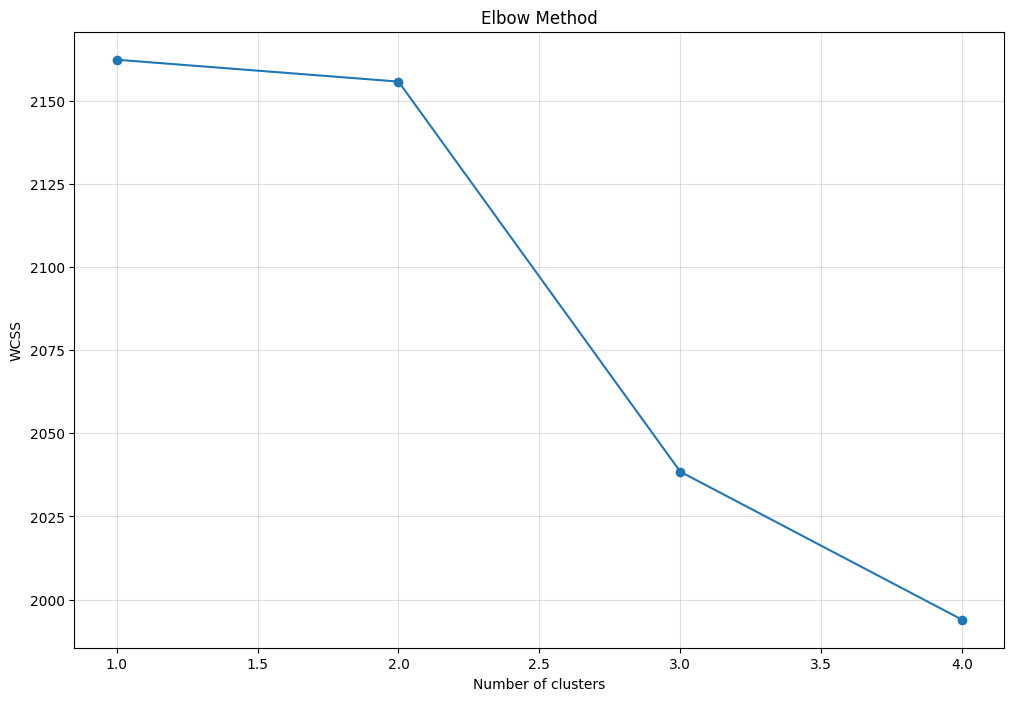

In [22]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(12,8))
plt.plot(range(1, 5), wcss, marker='o')
plt.grid(True, alpha=0.4)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

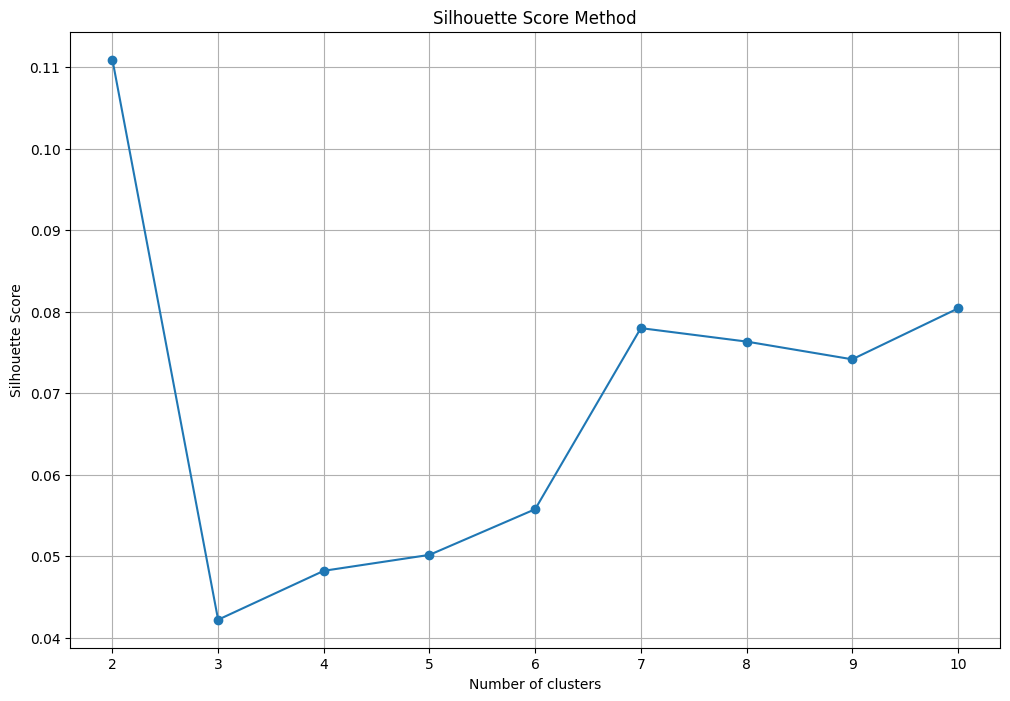

In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

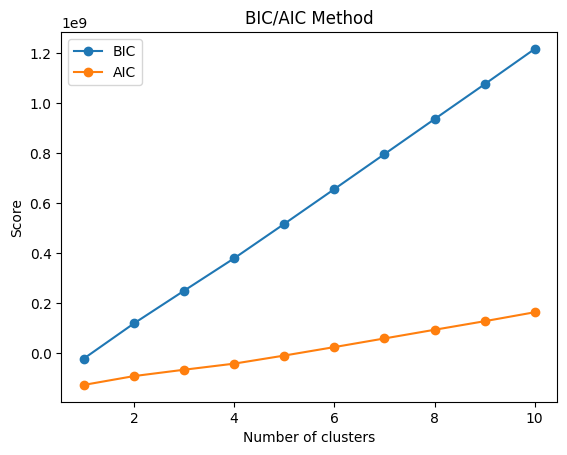

In [28]:
from sklearn.mixture import GaussianMixture

bic_scores = []
aic_scores = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(x_train.toarray())
    bic_scores.append(gmm.bic(x_train.toarray()))
    aic_scores.append(gmm.aic(x_train.toarray()))

plt.plot(range(1, 11), bic_scores, marker='o', label='BIC')
plt.plot(range(1, 11), aic_scores, marker='o', label='AIC')
plt.title('BIC/AIC Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()
plt.show()